First 5 rows:
   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       2.399199         108.00           6.00     64.00     0.833808   
1       0.000000          54.00           6.00     64.00    18.482402   
2       0.636285         131.98           6.00     64.00     3.723881   
3       1.111389       53911.37           6.93     82.09    66.654927   
4       0.142425       39503.40          16.78     63.80  5532.789390   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.833808    0.0              0.0              1.0              0.0  ...   
1    18.482402    0.0              0.0              0.0              0.0  ...   
2     3.723881    0.0              0.0              1.0              0.0  ...   
3    66.654927    0.0              0.0              0.0              0.0  ...   
4  5532.789390    0.0              0.0              0.0              0.0  ...   

          Std  Tot size           IAT  Number   Magnitue    

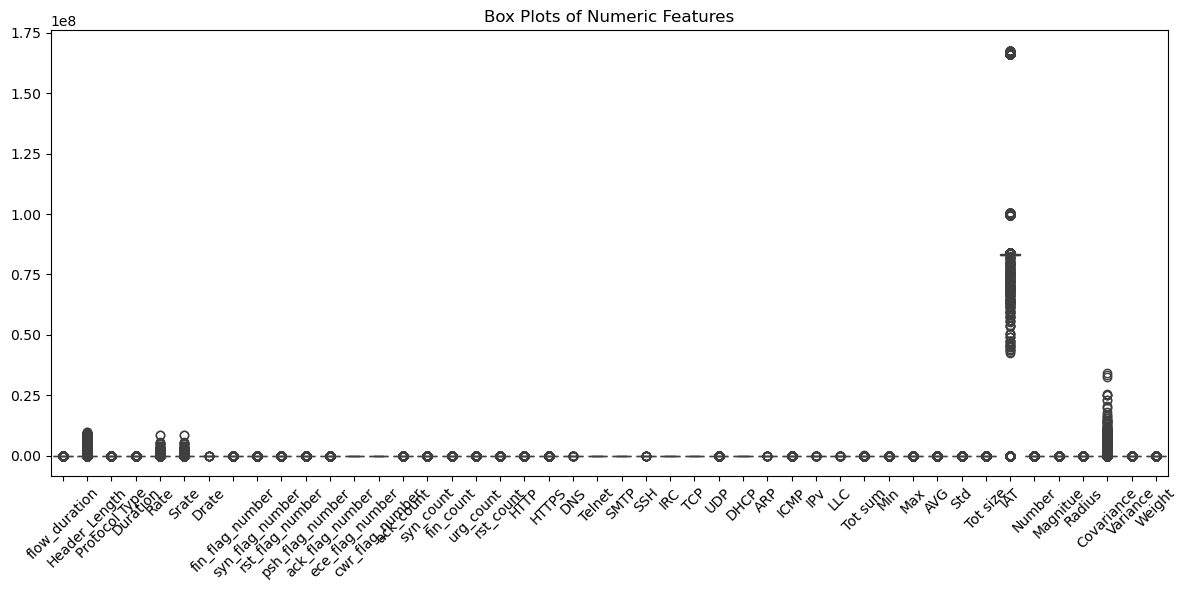

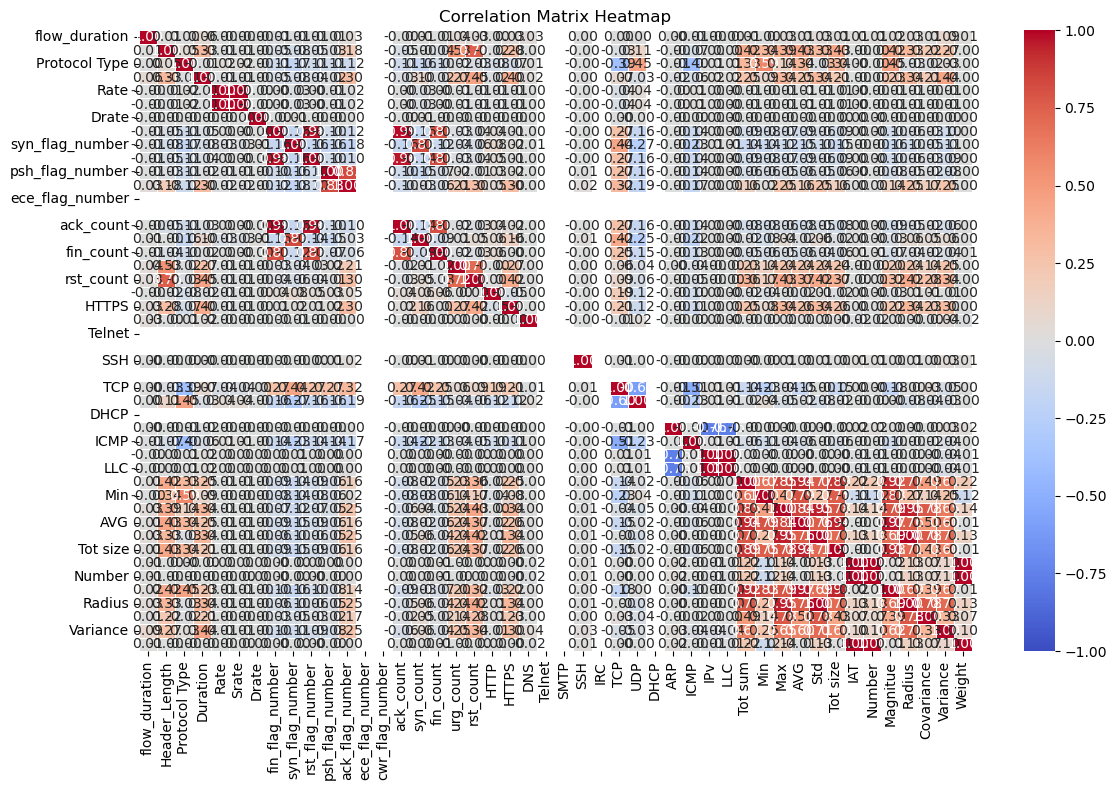

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
# Load dataset
df = pd.read_csv('C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')

# --------------------------
# 1. Data Exploration
# --------------------------
print("First 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

# Visualize numeric features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [2]:
# Handle missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())
threshold = 0.3 * len(df)
df_clean = df.dropna(axis=1, thresh=threshold)
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(df_clean.drop('label', axis=1)), 
                 columns=df_clean.drop('label', axis=1).columns)
y = df_clean['label']


Missing values before cleaning:
flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
l

In [3]:
# Remove duplicates
X = X.drop_duplicates()
y = y[X.index]


print(f"Rows after preprocessing: {len(X)}")

# --------------------------
# 2. Binary Classification
# --------------------------
print("\n" + "="*50)
print("BINARY CLASSIFICATION")
print("="*50)

# Encode labels
le_binary = LabelEncoder()
y_encoded = le_binary.fit_transform(y)

# Create binary labels (0 = Normal, 1 = Attack)
benign_keywords = ['benign', 'normal', 'legitimate','BenignTraffic']
benign_indices = [i for i, cls in enumerate(le_binary.classes_) 
                 if any(kw in cls.lower() for kw in benign_keywords)]

if benign_indices:
    benign_index = benign_indices[0]
    y_binary = np.where(y_encoded == benign_index, 0, 1)
else:
    # Fallback if no benign class found
    y_binary = np.ones_like(y_encoded)  # Mark all as attacks

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.3, stratify=y_binary, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verify class distribution
unique, counts = np.unique(y_balanced, return_counts=True)
print("\nClass distribution after SMOTE:")
print(f"Normal (0): {counts[0] if 0 in unique else 0}")
print(f"Attack (1): {counts[1] if 1 in unique else 0}")
                                                       

Rows after preprocessing: 238476

BINARY CLASSIFICATION

Class distribution after SMOTE:
Normal (0): 163104
Attack (1): 163104


Selected 15 features:
[ 2  7  9 12 14 16 23 24 33 35 36 38 39 40 45]


Final Accuracy: 0.993458
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1641
           1       1.00      0.99      1.00     69902

    accuracy                           0.99     71543
   macro avg       0.89      0.99      0.94     71543
weighted avg       0.99      0.99      0.99     71543



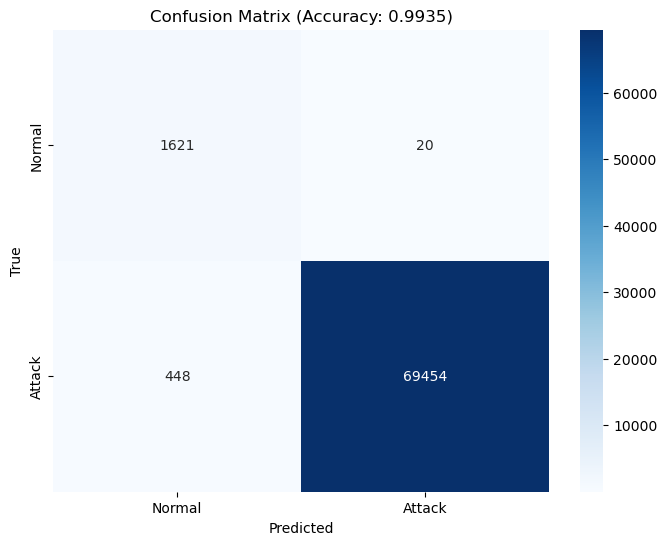

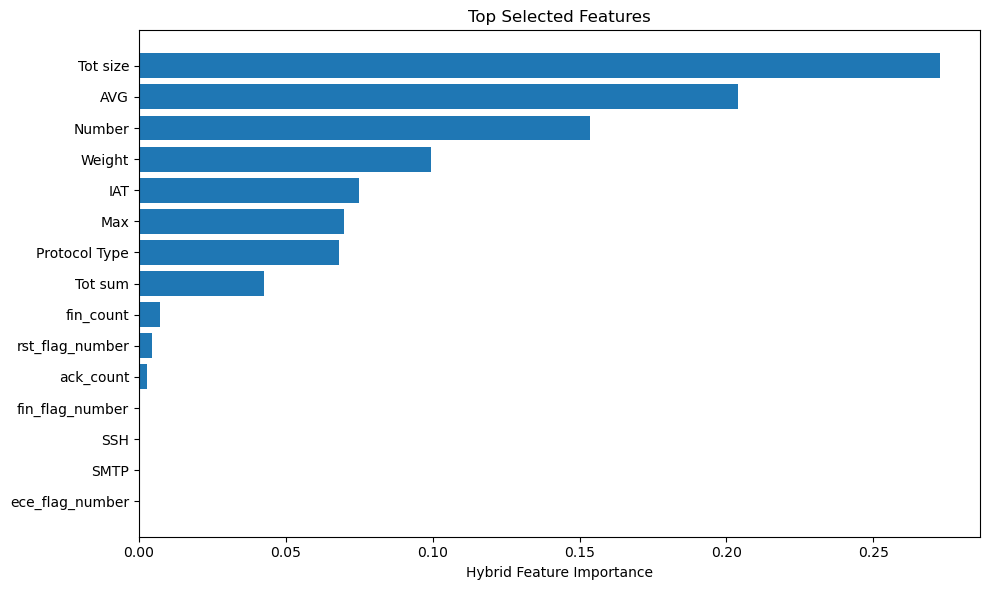

In [4]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.base import clone
class BinaryFeatureSelector:
    def __init__(self, X, y, n_features=10, n_iter=50):
        self.X = X
        self.y = y
        self.n_features = min(n_features, X.shape[1])
        self.n_iter = n_iter
        self.best_features = None
        self.best_score = -np.inf
        
    def _calculate_fitness(self, subset):
        if subset.sum() == 0:
            return -np.inf
            
        X_sub = self.X[:, subset.astype(bool)]
        
        # Stratified sampling for evaluation
        X_train, X_val, y_train, y_val = train_test_split(
            X_sub, self.y, test_size=0.2, stratify=self.y, random_state=42
        )
        
        # Lightweight model for evaluation
        model = RandomForestClassifier(
            n_estimators=50,
            max_depth=5,
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        return accuracy_score(y_val, model.predict(X_val))
    
    def optimize(self):
        # Initialize with MI-based features
        mi_scores = mutual_info_classif(self.X, self.y)
        top_mi_indices = np.argsort(mi_scores)[-self.n_features:]
        initial_subset = np.zeros(self.X.shape[1])
        initial_subset[top_mi_indices] = 1
        
        self.best_features = initial_subset
        self.best_score = self._calculate_fitness(initial_subset)
        
        # Iterative refinement
        for _ in range(self.n_iter):
            candidate = self.best_features.copy()
            
            # Mutation: flip 10% of features
            flip_mask = np.random.rand(len(candidate)) < 0.1
            candidate = np.logical_xor(candidate, flip_mask).astype(int)
            
            # Ensure we have exactly n_features
            if candidate.sum() > self.n_features:
                # Remove excess features randomly
                on_indices = np.where(candidate)[0]
                np.random.shuffle(on_indices)
                candidate[on_indices[:candidate.sum()-self.n_features]] = 0
            elif candidate.sum() < self.n_features:
                # Add missing features randomly
                off_indices = np.where(candidate == 0)[0]
                np.random.shuffle(off_indices)
                candidate[off_indices[:self.n_features-candidate.sum()]] = 1
                
            score = self._calculate_fitness(candidate)
            
            # Update if improvement
            if score > self.best_score:
                self.best_score = score
                self.best_features = candidate
                
        return self.best_features.astype(bool)
        # 3. Feature Selection
# --------------------------
# Initialize and run feature selector
feature_selector = BinaryFeatureSelector(
    X_balanced, 
    y_balanced,
    n_features=15,  # Optimal number of features
    n_iter=100
)
selected_mask = feature_selector.optimize()

print(f"Selected {selected_mask.sum()} features:")
print(np.where(selected_mask)[0])

# Prepare selected datasets
X_train_selected = X_balanced[:, selected_mask]
X_test_selected = X_test_scaled[:, selected_mask]

# 4. Hybrid Model Training
# --------------------------
# Optimized base models
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=np.sum(y_balanced == 0) / np.sum(y_balanced == 1),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    tree_method='hist'
)

# Stacking ensemble
stacking_model = StackingClassifier(
    estimators=[
        ('random_forest', rf),
        ('xgboost', xgb)
    ],
    final_estimator=LogisticRegression(
        C=0.1,
        solver='liblinear',
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    cv=5,
    n_jobs=-1,
    passthrough=True
)

# Create validation set from balanced training data
X_train_bal, X_val, y_train_bal, y_val = train_test_split(
    X_balanced, y_balanced, 
    test_size=0.2, 
    stratify=y_balanced, 
    random_state=42
)

# Train on training subset
stacking_model.fit(X_train_bal[:, selected_mask], y_train_bal)

# Final evaluation on test set
y_pred = stacking_model.predict(X_test_selected)
final_accuracy = accuracy_score(y_test, y_pred)
print("\n" + "="*50)
print(f"\nFinal Accuracy: {final_accuracy:.6f}")
print("="*50)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix and Feature Importance plots remain unchanged
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Attack'],
            yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (Accuracy: {final_accuracy:.4f})')
plt.show()
# Feature Importance - Corrected approach
rf = stacking_model.named_estimators_['random_forest']
xgb = stacking_model.named_estimators_['xgboost']

rf_imp = rf.feature_importances_
xgb_imp = xgb.feature_importances_
hybrid_imp = (rf_imp + xgb_imp) / 2

plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(hybrid_imp)
plt.barh(range(len(sorted_idx)), hybrid_imp[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[selected_mask][sorted_idx])
plt.xlabel('Hybrid Feature Importance')
plt.title('Top Selected Features')
plt.tight_layout()
plt.show()             

In [12]:
# =============================
# XAI Integration & Model Refinement (FINAL SOLUTION)
# =============================
import shap
import lime
import lime.lime_tabular
from sklearn.calibration import CalibratedClassifierCV
from sklearn.base import clone
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 0. Ensure models exist
# ------------------------
if 'stacking_model' not in globals():
    raise RuntimeError("Run 'Hybrid Model Training' section first!")

# 1. Performance Optimization & SHAP Fix
# --------------------------------------
print("Starting XAI analysis...")
start_time = time.time()

# Use larger sample for SHAP to improve reliability
sample_size = min(1000, X_val.shape[0])
sample_indices = np.random.choice(X_val.shape[0], sample_size, replace=False)
X_val_sample = X_val[sample_indices]
y_val_sample = y_val[sample_indices]

# Extract fitted base models
rf = stacking_model.named_estimators_['random_forest']
xgb = stacking_model.named_estimators_['xgboost']

print("Computing SHAP values...")

# Compute SHAP values for interpretation only (not for feature removal)
rf_explainer = shap.TreeExplainer(rf)
rf_shap_values = rf_explainer.shap_values(X_val_sample[:, selected_mask])

# Handle different output formats
if isinstance(rf_shap_values, list):
    # For binary classification in sklearn, we get [shap_values_class0, shap_values_class1]
    rf_shap_positive = rf_shap_values[1]  # Use class1 (attack)
elif len(rf_shap_values.shape) == 3:
    # 3D array: (samples, features, classes)
    rf_shap_positive = rf_shap_values[:, :, 1]  # Positive class
else:
    rf_shap_positive = rf_shap_values

# For XGBoost
xgb_explainer = shap.TreeExplainer(xgb)
xgb_shap_values = xgb_explainer.shap_values(X_val_sample[:, selected_mask])
if len(xgb_shap_values.shape) == 3:
    xgb_shap_positive = xgb_shap_values[:, :, 1]  # Positive class
else:
    xgb_shap_positive = xgb_shap_values

# Verify shapes
print(f"RF SHAP shape: {rf_shap_positive.shape}")
print(f"XGB SHAP shape: {xgb_shap_positive.shape}")

# 2. Feature Importance Visualization Only (No Removal)
# ----------------------------------------------------
# Calculate mean absolute SHAP values
rf_mean_abs = np.mean(np.abs(rf_shap_positive), axis=0)
xgb_mean_abs = np.mean(np.abs(xgb_shap_positive), axis=0)

# Ensure both are 1D arrays of the same length
if len(rf_mean_abs.shape) > 1:
    rf_mean_abs = rf_mean_abs.flatten()
if len(xgb_mean_abs.shape) > 1:
    xgb_mean_abs = xgb_mean_abs.flatten()
    
# Make sure both arrays have the same length (15 features)
rf_mean_abs = rf_mean_abs[:15] if len(rf_mean_abs) > 15 else rf_mean_abs
xgb_mean_abs = xgb_mean_abs[:15] if len(xgb_mean_abs) > 15 else xgb_mean_abs

hybrid_importance = (rf_mean_abs + xgb_mean_abs) / 2.0

# Visualization
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(hybrid_importance)[::-1]
top_features = X.columns[selected_mask][sorted_idx][:15]
top_importance = hybrid_importance[sorted_idx][:15]

plt.barh(top_features[::-1], top_importance[::-1], color='royalblue')
plt.xlabel('Hybrid SHAP Importance')
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.savefig('shap_feature_importance.png', dpi=150)
plt.close()
print("Saved SHAP importance plot")

# 3. Model Calibration (Without Feature Removal)
# ----------------------------------------------
print("Calibrating model...")
calibrated_model = CalibratedClassifierCV(
    stacking_model,  # Use original high-accuracy model
    method='isotonic', 
    cv=5,  # More folds for better calibration
    n_jobs=-1
)
calibrated_model.fit(X_val[:, selected_mask], y_val)  # Use full validation set

# 4. LIME Explanation
# -------------------
print("Generating LIME explanation...")
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_bal[:, selected_mask],
    feature_names=X.columns[selected_mask],
    class_names=['Normal', 'Attack'],
    mode='classification',
    discretize_continuous=True,
    random_state=42
)

# Explain first critical instance
critical_idx = np.where(y_test == 1)[0][0]
exp = lime_explainer.explain_instance(
    X_test_scaled[:, selected_mask][critical_idx], 
    calibrated_model.predict_proba, 
    num_features=10
)

# Save visualization
fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {critical_idx}")
plt.tight_layout()
plt.savefig('lime_explanation.png', dpi=150)
plt.close()

# 5. Final Evaluation
# -------------------
print("Running final evaluation...")
y_pred_calibrated = calibrated_model.predict(X_test_scaled[:, selected_mask])
final_accuracy = accuracy_score(y_test, y_pred_calibrated)

print("\n" + "="*50)
print(f"Optimized Accuracy: {final_accuracy:.6f}")
print("="*50)
print("Classification Report:")
print(classification_report(y_test, y_pred_calibrated))

# 6. Confusion Matrix
# -------------------
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_calibrated)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'],
            yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (Accuracy: {final_accuracy:.4f})')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150)
plt.close()

# 7. SHAP Dependence Plots (Top 2 only)
# -------------------------------------
print("Generating SHAP dependence plots...")
top_2_idx = np.argsort(hybrid_importance)[-2:]

for i, feature_idx in enumerate(top_2_idx):
    shap.dependence_plot(
        feature_idx,
        xgb_shap_positive,  # Use XGBoost for cleaner plot
        X_val_sample[:, selected_mask],
        feature_names=X.columns[selected_mask],
        show=False
    )
    plt.title(f"SHAP Dependence: {X.columns[selected_mask][feature_idx]}")
    plt.tight_layout()
    plt.savefig(f'shap_dependence_{i}.png', dpi=150)
    plt.close()

print(f"XAI analysis completed in {time.time()-start_time:.2f} seconds")

Starting XAI analysis...
Computing SHAP values...
RF SHAP shape: (1000, 15)
XGB SHAP shape: (1000, 15)
Saved SHAP importance plot
Calibrating model...
Generating LIME explanation...
Running final evaluation...

Optimized Accuracy: 0.993403
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1641
           1       1.00      0.99      1.00     69902

    accuracy                           0.99     71543
   macro avg       0.89      0.99      0.94     71543
weighted avg       0.99      0.99      0.99     71543

Generating SHAP dependence plots...
XAI analysis completed in 170.37 seconds
